<a href="https://www.kaggle.com/code/eavprog/abscur-sharp?scriptVersionId=133766615" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Рейтинг валют по абсолютным курсам и коэффициенту Шарпа 



In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import abscur_menu
import abscur_post as ap
from IPython.display import Markdown, display

# меню проекта
abscur_menu.print_menu()

# загружаем историю абсолютных курсов
abscur = pd.read_csv("/kaggle/input/abscur-data/abscur.csv",index_col=0,parse_dates=True)

# загружаем расшифровки для валют
cur_ras = pd.read_csv('/kaggle/input/abscur-data/cur_ras.csv',index_col=0)

img_cnt = 0
tabs = []
period = []

# код взять со страницы https://www.codearmo.com/blog/sharpe-sortino-and-calmar-ratios-python
# расчет коэффициента Шарпа
def sharpe_ratio(return_series, N=255, rf=0.01):
    mean = return_series.mean() * N -rf
    sigma = return_series.std() * np.sqrt(N)
    return mean / sigma

def rep(per,title_per):
    from IPython.display import Markdown, display
    
    global img_cnt,tabs,period
    
    display(Markdown("# За "+title_per))
    
    data_abs = abscur.copy()
    date_start = data_abs.asfreq(freq="D").index[-per]
    date_finish = data_abs.index[-1]
    res = sharpe_ratio(abscur[abscur.index >= date_start].pct_change())
    res.sort_values(ascending=False,inplace=True)
    res.plot.bar(grid=True,title="Рейтинг валют по абсолютному курсу за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по "+datetime.datetime.strftime(date_finish,"%Y-%m-%d"),ylabel="коэффициент Шарпа",legend=False,figsize=(15,5))
    
    plt.savefig(str(img_cnt) + ".png")
    img_cnt += 1
    
    plt.show()
    
    
    
    def make_clickable(val):
        if val == '...':
            return '...'
        return '<a target="_blank" href="{}">Wikipedia link</a>'.format(val)
    
    res = pd.DataFrame(res,index = res.index)
    res.columns = ['коэф.Шарпа']
    
    text = "**Самые выгодные и самые невыгодные по коэффициенту Шарпа валюты за " + title_per + ":**\n\n"
    text += "|код|коэф.Шарпа|расшифровка|ссылки|\n"
    text += "|-|-|-|-|\n"
    for n in range(5):
        cur = res.index[n]
        text += "|**" + cur + "**|" + str(np.round(res.loc[cur][0],3)) + "%|" + cur_ras.loc[cur][0] + "|[wiki](" + cur_ras.loc[cur][1] + "), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#" + cur + ")|\n"
    text += "|...|...|...|...|\n"
    for n in range(len(res.index)-5,len(res.index)):
        cur = res.index[n]
        text += "|**" + cur + "**|" + str(np.round(res.loc[cur][0],3)) + "%|" + cur_ras.loc[cur][0] + "|[wiki](" + cur_ras.loc[cur][1] + "), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#" + cur + ")|\n"
    display(Markdown(text))
    
    text = "См.также: "
    text += "[**Рейтинг абсолютной доходности за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной стабильности валют за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-" + title_per.replace(" ","-") + ")"
    display(Markdown(text))
    
    res = res.merge(cur_ras,left_index=True,right_index=True)
    
    res = pd.concat([res.iloc[:3,:],pd.DataFrame([{res.columns[0]: '...', 'Расшифровка':'...','Ссылка на Wikipedia':'...'}],index=['...']),res.iloc[-3:,:]]).style.format({'Ссылка на Wikipedia': make_clickable})
    
    tabs.append(res)
    period.append(title_per)
    
    return

# Оглавление проекта "Абсолютный валютный курс" 

![Проект "Абсолютный валютный курс"](https://i.ibb.co/cL0D27B/abscur-znak.jpg)

## Представительства проекта:
[**БЛОГ**](http://www.abscur.ru) - 
[**VK**](https://vk.com/abscur) - 
[**WhatsApp**](https://chat.whatsapp.com/KrNJXAKizPxDlDSjYfdpQs) - 
[**Viber**](https://invite.viber.com/?g2=AQB63y7Cm%2BNJK0tNZW%2F9kI00M6Wr8HuZ7XeamzN4jZCve8Aq9%2FiD3DY56Eqcf7dc) - 
[**Telegram**](https://t.me/AbsCur) - 
[**ОК**](https://ok.ru/group/53547043520717) - 
[**GitHub**](https://github.com/prog815/abscur) - 
[**YouTube**](https://www.youtube.com/@eavprog8/community) - 
[**Smart-Lab**](https://smart-lab.ru/my/eavpred/) - 
[**VC.ru**](https://vc.ru/s/1826351-absolyutnyy-kurs-valyut) - 
[**Kaggle**](https://www.kaggle.com/code/eavprog/abscur-about)

## Абсолютные валютные курсы:
- [О проекте](https://www.kaggle.com/eavprog/abscur-about)
- [Источник данных с абсолютными курсами](https://www.kaggle.com/code/eavprog/abscur-data) 
- [Последние абсолютные курсы](https://www.kaggle.com/code/eavprog/abscur-posled-kurs)
- [Графики истории абсолютных валютных курсов](https://www.kaggle.com/eavprog/abscur-hist)
- [Стоимость Абса](https://www.kaggle.com/eavprog/abscur-stoimost-absa)
- [Связь валют на графах через корреляцию](https://www.kaggle.com/code/eavprog/abscur-svyas-valut)
- [Рейтинг абсолютной доходности](https://www.kaggle.com/eavprog/abscur-reyting-dohod)
- [Рейтинг валют по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-sharp)
- [Рейтинг абсолютной стабильности валют](https://www.kaggle.com/eavprog/abscur-reit-stabil)

## Парные валютные курсы
- [Графики истории парных валютных курсов](https://www.kaggle.com/eavprog/abscur-par-hist)

## Голубые фишки Московской биржи
- [Абсолютные курсы голубых фишек Московской биржи](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki)
- [Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp)
- [Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа](https://www.kaggle.com/eavprog/abscur-bluefish-sharp-rub)

## Товары Московской биржи
- [Абсолютные курсы товаров Мосбиржи](https://www.kaggle.com/eavprog/mmvb-abscur-tovar)
- [Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный)](https://www.kaggle.com/eavprog/abscur-tovar-sharp)

---



# За месяц

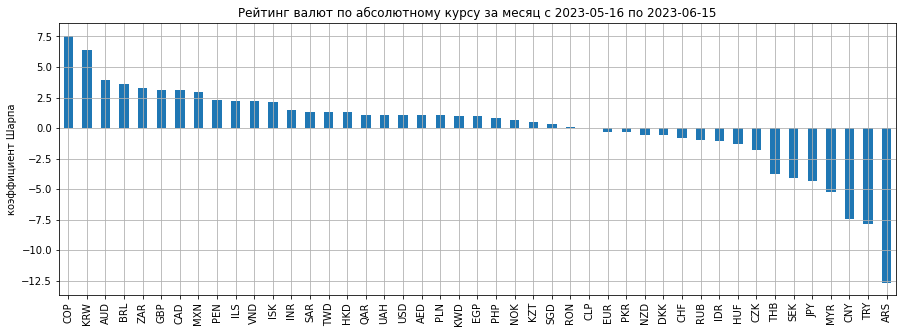

**Самые выгодные и самые невыгодные по коэффициенту Шарпа валюты за месяц:**

|код|коэф.Шарпа|расшифровка|ссылки|
|-|-|-|-|
|**COP**|7.571%|Колумбийское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BB%D1%83%D0%BC%D0%B1%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#COP)|
|**KRW**|6.416%|Южнокорейская вона|[wiki](https://ru.wikipedia.org/wiki/%D0%AE%D0%B6%D0%BD%D0%BE%D0%BA%D0%BE%D1%80%D0%B5%D0%B9%D1%81%D0%BA%D0%B0%D1%8F_%D0%B2%D0%BE%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#KRW)|
|**AUD**|3.955%|Австралийский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%81%D1%82%D1%80%D0%B0%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#AUD)|
|**BRL**|3.618%|Бразильский реал|[wiki](https://ru.wikipedia.org/wiki/%D0%91%D1%80%D0%B0%D0%B7%D0%B8%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B5%D0%B0%D0%BB), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#BRL)|
|**ZAR**|3.297%|Южноафриканский рэнд|[wiki](https://ru.wikipedia.org/wiki/%D0%AE%D0%B6%D0%BD%D0%BE%D0%B0%D1%84%D1%80%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%8D%D0%BD%D0%B4), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ZAR)|
|...|...|...|...|
|**JPY**|-4.354%|Японская иена|[wiki](https://ru.wikipedia.org/wiki/%D0%98%D0%B5%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#JPY)|
|**MYR**|-5.249%|Малайзийский ринггит|[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D0%BB%D0%B0%D0%B9%D0%B7%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B8%D0%BD%D0%B3%D0%B3%D0%B8%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#MYR)|
|**CNY**|-7.441%|Китайский юань|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%B8%D1%82%D0%B0%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%8E%D0%B0%D0%BD%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CNY)|
|**TRY**|-7.822%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|
|**ARS**|-12.661%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|


См.также: [**Рейтинг абсолютной доходности за месяц**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-месяц), [**Рейтинг абсолютной стабильности валют за месяц**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-месяц)

In [2]:
rep(31,"месяц")

# За квартал

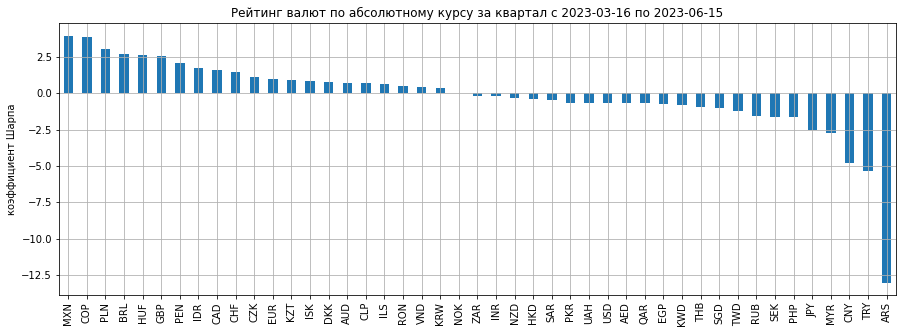

**Самые выгодные и самые невыгодные по коэффициенту Шарпа валюты за квартал:**

|код|коэф.Шарпа|расшифровка|ссылки|
|-|-|-|-|
|**MXN**|3.944%|Мексиканское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%BA%D1%81%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#MXN)|
|**COP**|3.865%|Колумбийское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BB%D1%83%D0%BC%D0%B1%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#COP)|
|**PLN**|3.02%|Польский злотый|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%B7%D0%BB%D0%BE%D1%82%D1%8B%D0%B9), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PLN)|
|**BRL**|2.653%|Бразильский реал|[wiki](https://ru.wikipedia.org/wiki/%D0%91%D1%80%D0%B0%D0%B7%D0%B8%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B5%D0%B0%D0%BB), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#BRL)|
|**HUF**|2.595%|Венгерский форинт|[wiki](https://ru.wikipedia.org/wiki/%D0%A4%D0%BE%D1%80%D0%B8%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#HUF)|
|...|...|...|...|
|**JPY**|-2.511%|Японская иена|[wiki](https://ru.wikipedia.org/wiki/%D0%98%D0%B5%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#JPY)|
|**MYR**|-2.724%|Малайзийский ринггит|[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D0%BB%D0%B0%D0%B9%D0%B7%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B8%D0%BD%D0%B3%D0%B3%D0%B8%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#MYR)|
|**CNY**|-4.761%|Китайский юань|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%B8%D1%82%D0%B0%D0%B9%D1%81%D0%BA%D0%B8%D0%B9_%D1%8E%D0%B0%D0%BD%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CNY)|
|**TRY**|-5.347%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|
|**ARS**|-13.004%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|


См.также: [**Рейтинг абсолютной доходности за квартал**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-квартал), [**Рейтинг абсолютной стабильности валют за квартал**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-квартал)

In [3]:
rep(92,"квартал")

# За полгода

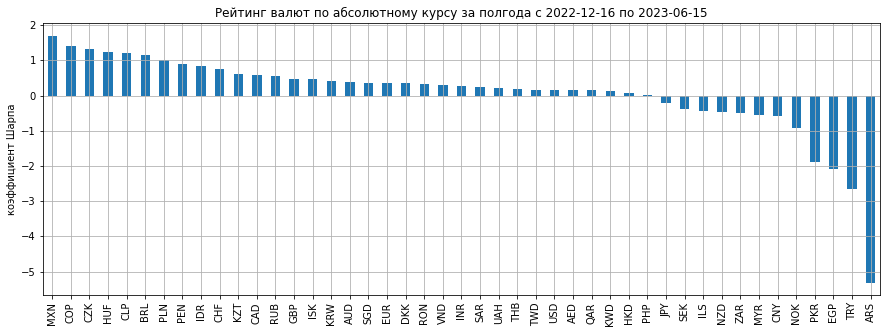

**Самые выгодные и самые невыгодные по коэффициенту Шарпа валюты за полгода:**

|код|коэф.Шарпа|расшифровка|ссылки|
|-|-|-|-|
|**MXN**|1.703%|Мексиканское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%BA%D1%81%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#MXN)|
|**COP**|1.422%|Колумбийское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BB%D1%83%D0%BC%D0%B1%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#COP)|
|**CZK**|1.323%|Чешская крона|[wiki](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D1%88%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D1%80%D0%BE%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CZK)|
|**HUF**|1.23%|Венгерский форинт|[wiki](https://ru.wikipedia.org/wiki/%D0%A4%D0%BE%D1%80%D0%B8%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#HUF)|
|**CLP**|1.204%|Чилийское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%A7%D0%B8%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CLP)|
|...|...|...|...|
|**NOK**|-0.924%|Норвежская крона|[wiki](https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%B2%D0%B5%D0%B6%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D1%80%D0%BE%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#NOK)|
|**PKR**|-1.875%|Пакистанская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D0%BA%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PKR)|
|**EGP**|-2.084%|Египетский фунт|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B3%D0%B8%D0%BF%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%83%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EGP)|
|**TRY**|-2.645%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|
|**ARS**|-5.315%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|


См.также: [**Рейтинг абсолютной доходности за полгода**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-полгода), [**Рейтинг абсолютной стабильности валют за полгода**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-полгода)

In [4]:
rep(182,"полгода")

# За год

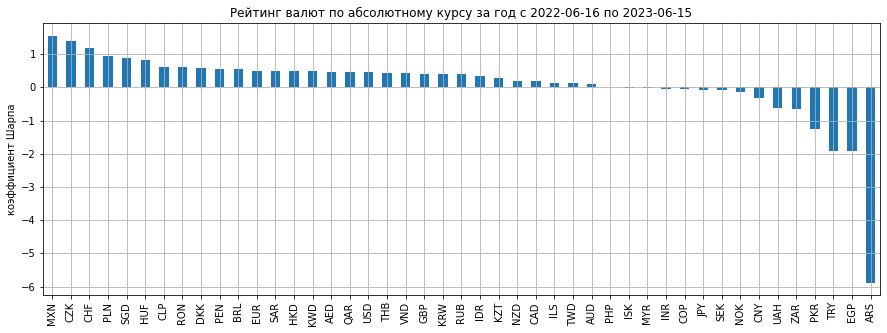

**Самые выгодные и самые невыгодные по коэффициенту Шарпа валюты за год:**

|код|коэф.Шарпа|расшифровка|ссылки|
|-|-|-|-|
|**MXN**|1.56%|Мексиканское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%BA%D1%81%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#MXN)|
|**CZK**|1.407%|Чешская крона|[wiki](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D1%88%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D1%80%D0%BE%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CZK)|
|**CHF**|1.194%|Швейцарский франк|[wiki](https://ru.wikipedia.org/wiki/%D0%A8%D0%B2%D0%B5%D0%B9%D1%86%D0%B0%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%80%D0%B0%D0%BD%D0%BA), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CHF)|
|**PLN**|0.94%|Польский злотый|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%B7%D0%BB%D0%BE%D1%82%D1%8B%D0%B9), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PLN)|
|**SGD**|0.892%|Сингапурский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D0%B0%D0%BF%D1%83%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#SGD)|
|...|...|...|...|
|**ZAR**|-0.658%|Южноафриканский рэнд|[wiki](https://ru.wikipedia.org/wiki/%D0%AE%D0%B6%D0%BD%D0%BE%D0%B0%D1%84%D1%80%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D1%8D%D0%BD%D0%B4), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ZAR)|
|**PKR**|-1.263%|Пакистанская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D0%BA%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PKR)|
|**TRY**|-1.904%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|
|**EGP**|-1.907%|Египетский фунт|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B3%D0%B8%D0%BF%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%83%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EGP)|
|**ARS**|-5.881%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|


См.также: [**Рейтинг абсолютной доходности за год**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-год), [**Рейтинг абсолютной стабильности валют за год**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-год)

In [5]:
rep(1*365,"год")

# За 2 года

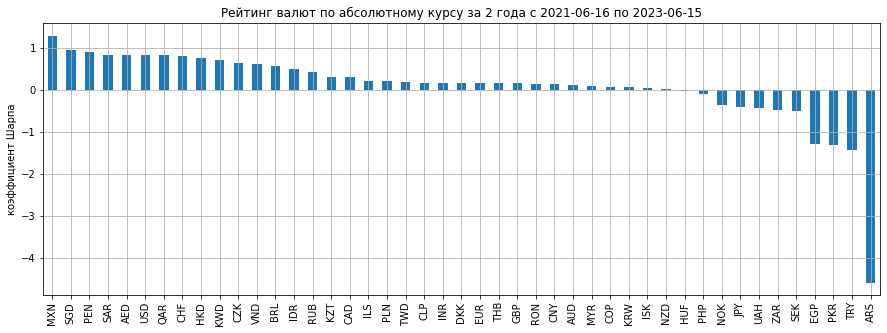

**Самые выгодные и самые невыгодные по коэффициенту Шарпа валюты за 2 года:**

|код|коэф.Шарпа|расшифровка|ссылки|
|-|-|-|-|
|**MXN**|1.283%|Мексиканское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%BA%D1%81%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#MXN)|
|**SGD**|0.943%|Сингапурский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D0%B0%D0%BF%D1%83%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#SGD)|
|**PEN**|0.89%|Перуанский новый соль|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D1%83%D0%B0%D0%BD%D1%81%D0%BA%D0%B8%D0%B9_%D0%BD%D0%BE%D0%B2%D1%8B%D0%B9_%D1%81%D0%BE%D0%BB%D1%8C), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PEN)|
|**SAR**|0.826%|Саудовский риял|[wiki](https://ru.wikipedia.org/wiki/%D0%A1%D0%B0%D1%83%D0%B4%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B8%D1%8F%D0%BB), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#SAR)|
|**AED**|0.82%|Дирхам ОАЭ|[wiki](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D1%80%D1%85%D0%B0%D0%BC_%D0%9E%D0%90%D0%AD), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#AED)|
|...|...|...|...|
|**SEK**|-0.506%|Шведская крона|[wiki](https://ru.wikipedia.org/wiki/%D0%A8%D0%B2%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D1%80%D0%BE%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#SEK)|
|**EGP**|-1.295%|Египетский фунт|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B3%D0%B8%D0%BF%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%83%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EGP)|
|**PKR**|-1.325%|Пакистанская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D0%BA%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PKR)|
|**TRY**|-1.426%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|
|**ARS**|-4.585%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|


См.также: [**Рейтинг абсолютной доходности за 2 года**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-2-года), [**Рейтинг абсолютной стабильности валют за 2 года**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-2-года)

In [6]:
rep(2*365,"2 года")

# За 3 года

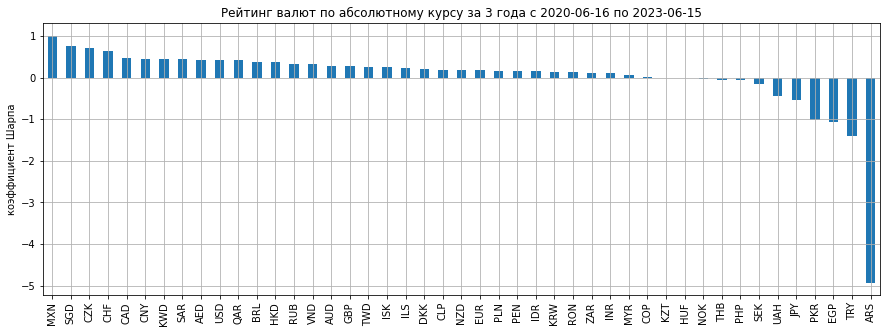

**Самые выгодные и самые невыгодные по коэффициенту Шарпа валюты за 3 года:**

|код|коэф.Шарпа|расшифровка|ссылки|
|-|-|-|-|
|**MXN**|1.008%|Мексиканское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%BA%D1%81%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#MXN)|
|**SGD**|0.752%|Сингапурский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D0%B0%D0%BF%D1%83%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#SGD)|
|**CZK**|0.72%|Чешская крона|[wiki](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D1%88%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D1%80%D0%BE%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CZK)|
|**CHF**|0.627%|Швейцарский франк|[wiki](https://ru.wikipedia.org/wiki/%D0%A8%D0%B2%D0%B5%D0%B9%D1%86%D0%B0%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%80%D0%B0%D0%BD%D0%BA), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CHF)|
|**CAD**|0.476%|Канадский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%B0%D0%BD%D0%B0%D0%B4%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CAD)|
|...|...|...|...|
|**JPY**|-0.549%|Японская иена|[wiki](https://ru.wikipedia.org/wiki/%D0%98%D0%B5%D0%BD%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#JPY)|
|**PKR**|-1.023%|Пакистанская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D0%BA%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PKR)|
|**EGP**|-1.057%|Египетский фунт|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B3%D0%B8%D0%BF%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%83%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EGP)|
|**TRY**|-1.406%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|
|**ARS**|-4.927%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|


См.также: [**Рейтинг абсолютной доходности за 3 года**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-3-года), [**Рейтинг абсолютной стабильности валют за 3 года**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-3-года)

In [7]:
rep(3*365,"3 года")

# За 5 лет

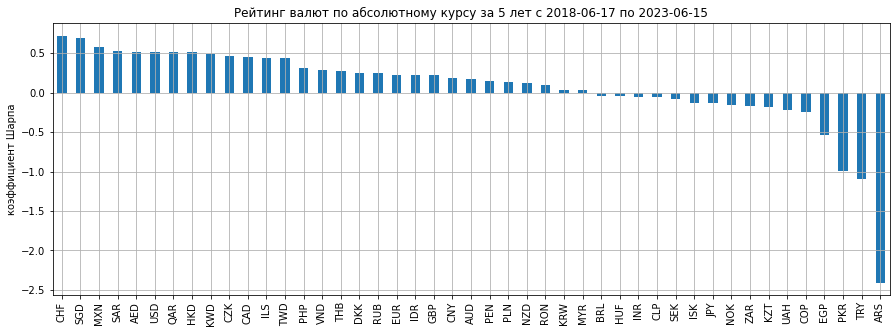

**Самые выгодные и самые невыгодные по коэффициенту Шарпа валюты за 5 лет:**

|код|коэф.Шарпа|расшифровка|ссылки|
|-|-|-|-|
|**CHF**|0.726%|Швейцарский франк|[wiki](https://ru.wikipedia.org/wiki/%D0%A8%D0%B2%D0%B5%D0%B9%D1%86%D0%B0%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%80%D0%B0%D0%BD%D0%BA), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#CHF)|
|**SGD**|0.7%|Сингапурский доллар|[wiki](https://ru.wikipedia.org/wiki/%D0%A1%D0%B8%D0%BD%D0%B3%D0%B0%D0%BF%D1%83%D1%80%D1%81%D0%BA%D0%B8%D0%B9_%D0%B4%D0%BE%D0%BB%D0%BB%D0%B0%D1%80), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#SGD)|
|**MXN**|0.587%|Мексиканское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%BA%D1%81%D0%B8%D0%BA%D0%B0%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#MXN)|
|**SAR**|0.528%|Саудовский риял|[wiki](https://ru.wikipedia.org/wiki/%D0%A1%D0%B0%D1%83%D0%B4%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D1%80%D0%B8%D1%8F%D0%BB), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#SAR)|
|**AED**|0.524%|Дирхам ОАЭ|[wiki](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D1%80%D1%85%D0%B0%D0%BC_%D0%9E%D0%90%D0%AD), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#AED)|
|...|...|...|...|
|**COP**|-0.239%|Колумбийское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BB%D1%83%D0%BC%D0%B1%D0%B8%D0%B9%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#COP)|
|**EGP**|-0.53%|Египетский фунт|[wiki](https://ru.wikipedia.org/wiki/%D0%95%D0%B3%D0%B8%D0%BF%D0%B5%D1%82%D1%81%D0%BA%D0%B8%D0%B9_%D1%84%D1%83%D0%BD%D1%82), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#EGP)|
|**PKR**|-0.986%|Пакистанская рупия|[wiki](https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D0%BA%D0%B8%D1%81%D1%82%D0%B0%D0%BD%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D1%83%D0%BF%D0%B8%D1%8F), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#PKR)|
|**TRY**|-1.087%|Турецкая лира|[wiki](https://ru.wikipedia.org/wiki/%D0%A2%D1%83%D1%80%D0%B5%D1%86%D0%BA%D0%B0%D1%8F_%D0%BB%D0%B8%D1%80%D0%B0), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#TRY)|
|**ARS**|-2.409%|Аргентинское песо|[wiki](https://ru.wikipedia.org/wiki/%D0%90%D1%80%D0%B3%D0%B5%D0%BD%D1%82%D0%B8%D0%BD%D1%81%D0%BA%D0%BE%D0%B5_%D0%BF%D0%B5%D1%81%D0%BE), [график](https://www.kaggle.com/code/eavprog/abscur-hist/notebook#ARS)|


См.также: [**Рейтинг абсолютной доходности за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-5-лет), [**Рейтинг абсолютной стабильности валют за 5 лет**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-5-лет)

In [8]:
rep(5*365,"5 лет")

In [9]:
import numpy as np

num = np.random.randint(img_cnt)
text = f"За {period[num]} более всего были выгодны для вложения (самый большой коэффициент Шарпа для абсолютных курсов) такие валюты как {tabs[num].data.iloc[0,1]}, {tabs[num].data.iloc[1,1]} и {tabs[num].data.iloc[2,1]}. Менее всех выгодны для вложения (самый маленький коэффициент Шарпа для абсолютных курсов) были такие валюты как {tabs[num].data.iloc[-1,1]}, {tabs[num].data.iloc[-2,1]} и {tabs[num].data.iloc[-3,1]}."
text += "\n---\nИсточник - https://www.kaggle.com/code/eavprog/abscur-sharp"
img_file = str(num) + ".png"
ap.send_img_and_text(img_file,text)
